In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [113]:
df = pd.read_csv('D:/kaggle/bigmart-sales-prediction/dataset/train.csv')

In [114]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [115]:
df.shape

(8523, 12)

In [116]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Using mean to replace missing values


In [118]:
m = df['Item_Weight'].mean() # filling all nans with this value

In [119]:
df['Item_Weight'].fillna(m,inplace = True) # change in orignal dataset

In [120]:
df['Item_Weight'].isna().sum()

0

## Replacing missing values with modes in each category


In [121]:
mode_table = df.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type',aggfunc = (lambda x:x.mode()[0]))
# values='Outlet_Size': Specifies the column ('Outlet_Size') whose values will be used in the pivot table.

# columns='Outlet_Type': Specifies the column ('Outlet_Type') whose unique values will become the new columns in the pivot table.
# aggfunc=lambda x: x.mode()[0]: Specifies the aggregation function to be applied to the values. 
# In this case, for each group defined by a unique 'Outlet_Type', 
# it calculates the mode of the 'Outlet_Size' values and selects the first mode value.

In [122]:
print(mode_table)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [123]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [124]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_table[x])

In [125]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [126]:
df['Outlet_Size'][3]

'Small'

In [127]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [128]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


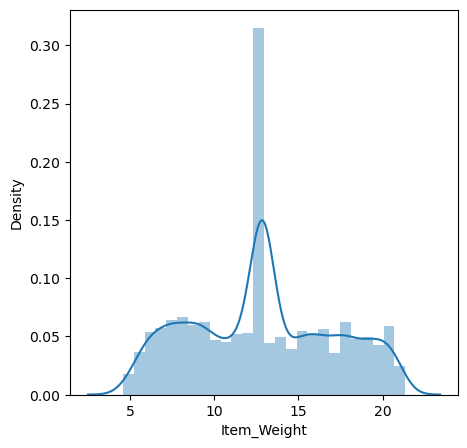

In [72]:
plt.figure(figsize = (5,5))
sns.distplot(df['Item_Weight'])
plt.show()

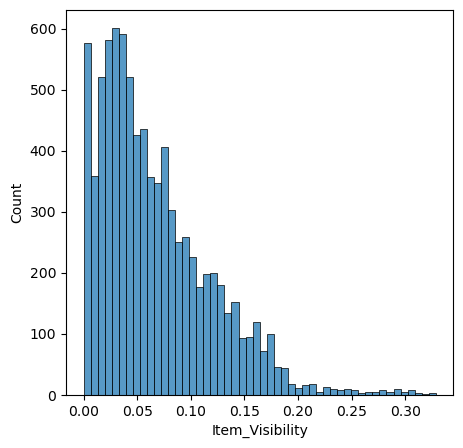

In [62]:
plt.figure(figsize = (5,5))
sns.histplot(df['Item_Visibility'])
plt.show()

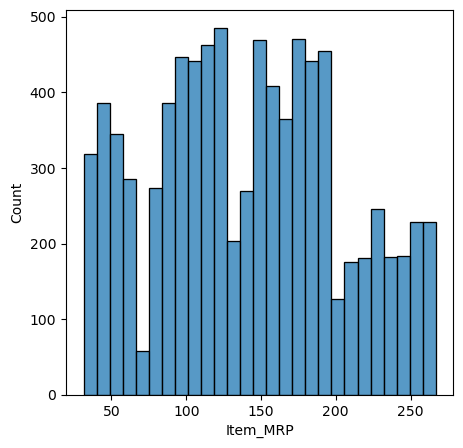

In [63]:
plt.figure(figsize = (5,5))
sns.histplot(df['Item_MRP'])
plt.show()

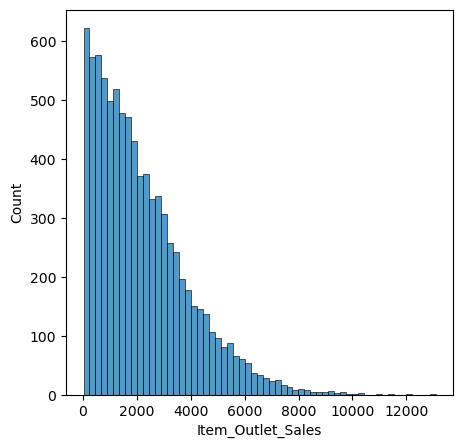

In [64]:
plt.figure(figsize = (5,5))
sns.histplot(df['Item_Outlet_Sales'])
plt.show()

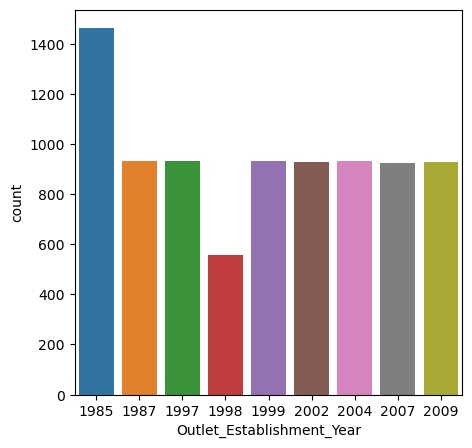

In [69]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Outlet_Establishment_Year',data = df)
plt.show()

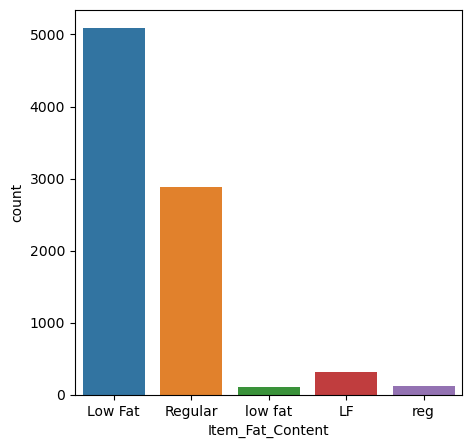

In [129]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Item_Fat_Content',data = df)
plt.show() # Need more preprocessing

In [132]:
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace = True)

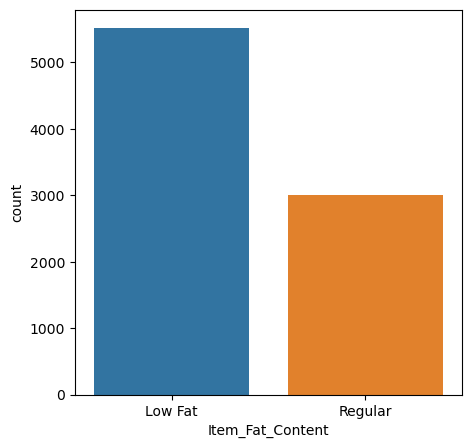

In [133]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Item_Fat_Content',data = df)
plt.show() # Need more preprocessing

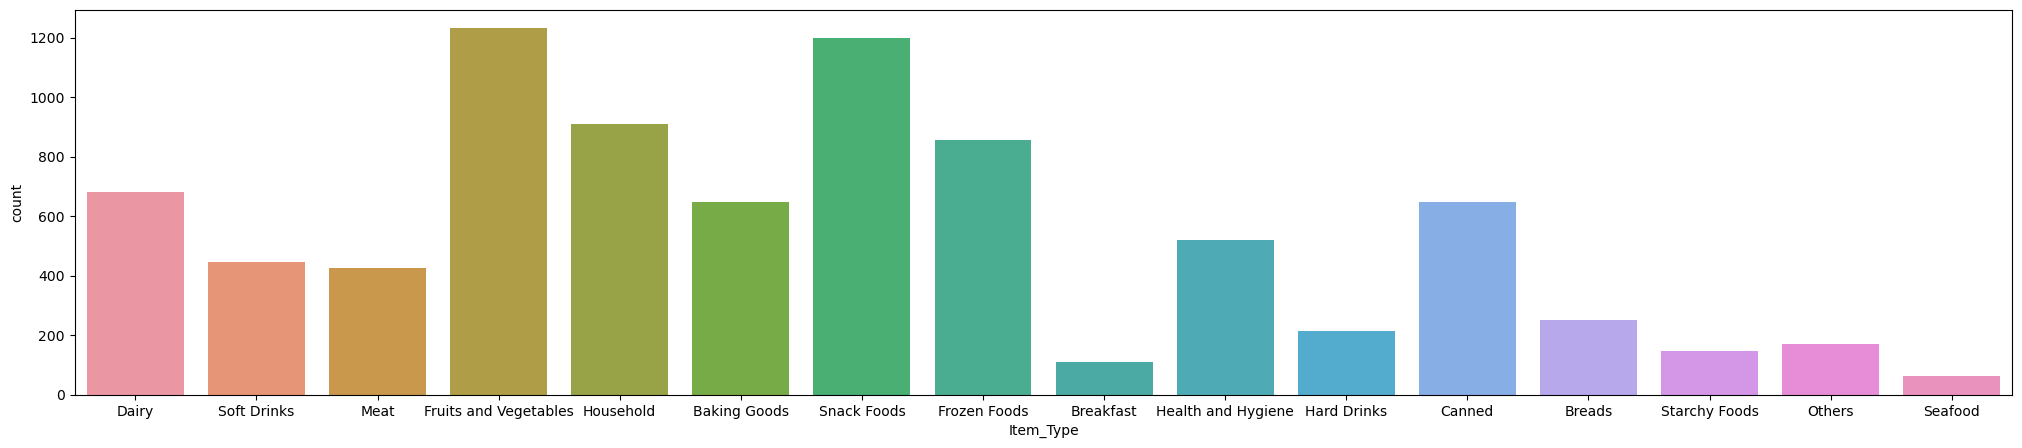

In [130]:
plt.figure(figsize = (25,5))
sns.countplot(x = 'Item_Type',data = df)
plt.show()

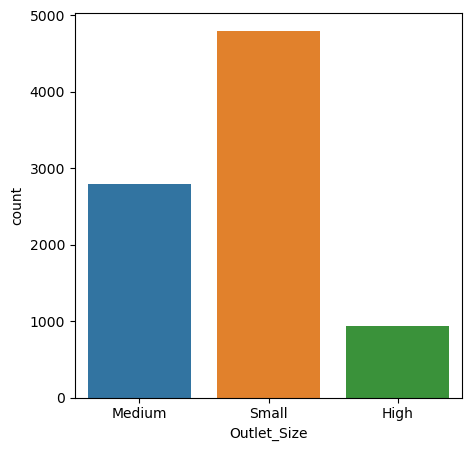

In [131]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'Outlet_Size',data = df)
plt.show()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Label encoding

In [138]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])






In [139]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


In [143]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [151]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size = 0.2, random_state  = 1)

## Training

In [156]:
import xgboost as xb

In [158]:
regressor = xb.XGBRegressor()

In [159]:
regressor.fit(xtr,ytr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## prediction

In [160]:
predictions = regressor.predict(xtr)

In [162]:
# R SQUare value
from sklearn import metrics
r2train = metrics.r2_score(ytr,predictions)
r2train

0.8809357585915896

In [163]:
predictions_test = regressor.predict(xts)

In [164]:
r2train1 = metrics.r2_score(yts,predictions_test)
r2train1

0.49709545082366713